In [2]:
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')
    


# Specify the file path
file_path = "data_collected_errorstat_wo_noise_1_run=9.parquet"

# Use pyarrow to read the Parquet file
table = pq.read_table(file_path)

# Convert the table to a pandas DataFrame if needed
df = table.to_pandas()
df

,minus_m_1_orig_x_real,point_orig_x_real,plus_m_1_orig_x_real,minus_m_1_orig_x_imag,point_orig_x_imag,plus_m_1_orig_x_imag,point_label,point_x_shifted_real,point_x_shifted_imag
0,-1.0,-3.0,1.0,3.0,-3.0,3.0,8.0,-2.960692,-3.265896
1,-3.0,1.0,3.0,-3.0,3.0,1.0,3.0,1.241048,3.279490
2,1.0,3.0,-1.0,3.0,1.0,-1.0,6.0,2.960995,0.799621
3,3.0,-1.0,3.0,1.0,-1.0,-3.0,13.0,-0.546501,-1.279293
4,-1.0,3.0,1.0,-1.0,-3.0,-1.0,10.0,3.004317,-3.864147
...,...,...,...,...,...,...,...,...,...
65531,-3.0,-1.0,3.0,1.0,-3.0,3.0,9.0,-0.326692,-3.388678
65532,-1.0,3.0,1.0,-3.0,3.0,3.0,2.0,2.908149,3.673755
65533,3.0,1.0,-3.0,3.0,3.0,3.0,3.0,1.155143,2.556578
65534,1.0,-3.0,-1.0,3.0,3.0,3.0,0.0,-2.826364,3.117335


In [3]:
def get_triplet_points(df, triplet):
    # Extract the middle label from the triplet
    middle_label = triplet[1]
    
    # Filter the DataFrame for the given triplet, but find the second occurrence
    triplet_df = df[
        (df['point_label'].shift(1) == triplet[0]) &
        (df['point_label'] == middle_label) &
        (df['point_label'].shift(-1) == triplet[2])
    ]
    
    # Extract 'point_x_shifted_real' and 'point_x_shifted_imag' values
    points = triplet_df[['point_x_shifted_real', 'point_x_shifted_imag']].values
    
    return points, triplet_df

# Example usage:
# Assuming 'df' is your DataFrame and 'triplet' is the triplet you want to find
triplet = (10, 15, 11)
points, triplet_df = get_triplet_points(df, triplet)
print(points)


[[ 0.6948471  -0.79490473]
 [ 0.76654207 -1.06694264]
 [ 1.08163822 -1.23766964]
 [ 1.44261966 -1.13280676]
 [ 0.83537633 -1.68131183]
 [ 1.19307105 -0.8200721 ]
 [ 0.93149862 -0.986108  ]
 [ 0.64938381 -1.16408618]
 [ 1.76268577 -0.22208199]
 [ 1.10129422 -1.70646237]
 [ 0.46992788 -1.73705494]
 [ 1.24406429 -0.69450313]
 [ 1.45380878 -0.99127486]
 [ 0.79337075 -1.01145569]
 [ 0.85712891 -1.1692229 ]
 [ 1.23746745 -1.03359653]]


In [4]:
import pyarrow.parquet as pq
import pandas as pd

# Define the number of runs
num_runs = 255

# Create a dictionary to store the dataframes
dfs = {}

# Loop through each run
for run in range(1, num_runs + 1):
    # Construct the file path for the Parquet file
    file_path = f"data_collected_errorstat_wo_noise_1_run={run}.parquet"
    
    # Use pyarrow to read the Parquet file
    table = pq.read_table(file_path)
    
    # Convert the table to a pandas DataFrame
    df_name = f"df{run}"
    dfs[df_name] = table.to_pandas()

# Now you have df1 to df256, each containing data from a different Parquet file



In [5]:
dfs['df1']

,minus_m_1_orig_x_real,point_orig_x_real,plus_m_1_orig_x_real,minus_m_1_orig_x_imag,point_orig_x_imag,plus_m_1_orig_x_imag,point_label,point_x_shifted_real,point_x_shifted_imag
0,3.0,-3.0,-3.0,-3.0,-1.0,-1.0,12.0,-3.359375,-1.461938
1,-3.0,-3.0,1.0,-1.0,-1.0,-3.0,12.0,-3.197526,-1.371236
2,-3.0,1.0,-1.0,-1.0,-3.0,-3.0,11.0,1.769789,-2.827723
3,1.0,-1.0,1.0,-3.0,-3.0,-3.0,9.0,-0.521995,-2.817383
4,-1.0,1.0,3.0,-3.0,-3.0,-3.0,11.0,1.336315,-3.301024
...,...,...,...,...,...,...,...,...,...
65531,3.0,-3.0,3.0,-3.0,1.0,-3.0,4.0,-2.427301,1.512931
65532,-3.0,3.0,-1.0,1.0,-3.0,3.0,10.0,3.222830,-2.599080
65533,3.0,-1.0,-1.0,-3.0,3.0,3.0,1.0,-1.774039,2.978230
65534,-1.0,-1.0,3.0,3.0,3.0,-3.0,1.0,-1.716481,2.715029


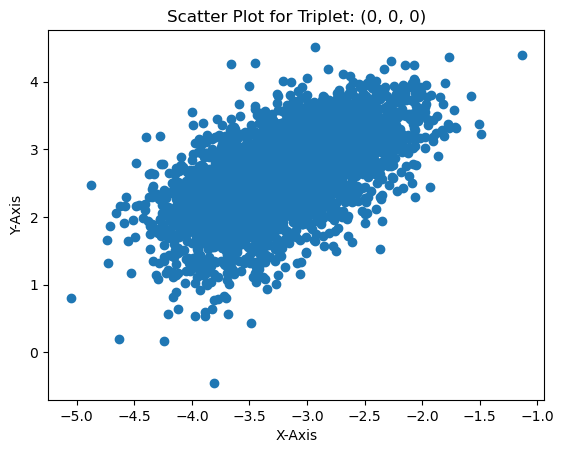

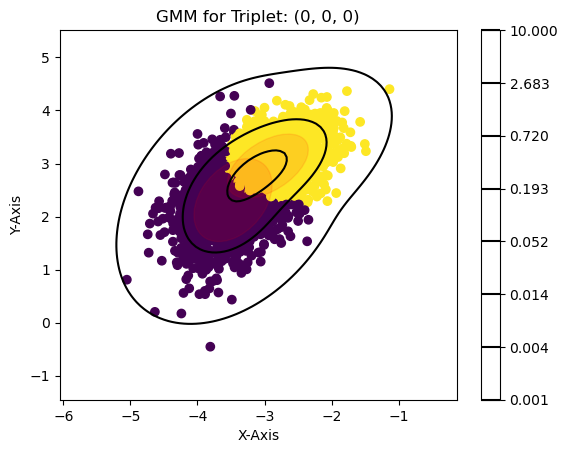

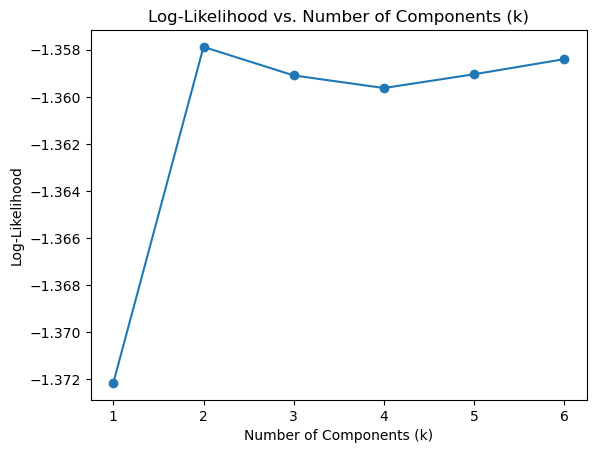

Mu :
 [[-3.46983857  2.31101108]
 [-2.94941872  2.95294601]]


Sigma :
 [[[0.16958501 0.08285108]
  [0.08285108 0.30574936]]

 [[0.18127181 0.09216206]
  [0.09216206 0.18139646]]]


In [9]:
triplet = (0, 0,0)

# Create an empty list to store the results
points = []

# Loop through each DataFrame (df1 to df256) and apply the function
for run in range(1, num_runs + 1):
    df_name = f"df{run}"
    current_df = dfs[df_name]  # Get the DataFrame
    current_points, _ = get_triplet_points(current_df, triplet)  # Apply the function
    points.append(current_points)  # Append the result to the list

# Now, 'points' is a list containing the results for each DataFrame
import matplotlib.pyplot as plt
import numpy as np



# Concatenate all points into a single array
combined_points = np.concatenate(points)

# Create a scatter plot with all the points
plt.scatter(combined_points[:, 0], combined_points[:, 1])

# Add labels and a title
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'Scatter Plot for Triplet: {triplet}')

# Show the plot
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")
# Assuming 'combined_points' contains the 2D points you want to fit with GMM

# Create a GMM with a desired number of components (e.g., 3)
num_components = 2
gmm = GaussianMixture(n_components=num_components, random_state=0)
gmm.fit(combined_points)

# Create a scatter plot of the data points
plt.scatter(combined_points[:, 0], combined_points[:, 1], c=gmm.predict(combined_points), cmap='viridis')

# Plot ellipsoids and contour lines for each component
x = np.linspace(combined_points[:, 0].min() - 1, combined_points[:, 0].max() + 1, 100)
y = np.linspace(combined_points[:, 1].min() - 1, combined_points[:, 1].max() + 1, 100)
X_grid, Y_grid = np.meshgrid(x, y)
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
Z = -gmm.score_samples(XY_grid)  # Use negative log-likelihood for contour levels

# Contour lines
contour_levels = np.logspace(-3, 1, 8)
contour = plt.contour(X_grid, Y_grid, Z.reshape(X_grid.shape), levels=contour_levels, colors='k', alpha=1)

# Plot ellipsoids
for i in range(num_components):
    mean = gmm.means_[i]
    cov_matrix = gmm.covariances_[i]
    v, w = np.linalg.eigh(cov_matrix)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color='red', alpha=0.1)
    plt.gca().add_patch(ell)

# Add labels and a title
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'GMM for Triplet: {triplet}')

# Show the plot
plt.colorbar(contour)
plt.show()
means = gmm.means_
covariances = gmm.covariances_
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming 'combined_points' contains the 2D points you want to fit with GMM

# Create a range of values for k (number of components)
k_values = range(1, 7)

# Initialize lists to store log-likelihood values
log_likelihoods = []

# Fit GMMs with different values of k and record log-likelihoods
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(combined_points)
    log_likelihood = gmm.score(combined_points)
    log_likelihoods.append(log_likelihood)

# Plot the log-likelihood values for different k
plt.plot(k_values, log_likelihoods, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Number of Components (k)')

plt.show()
print(f'Mu :\n {means}')
print('\n')
print(f'Sigma :\n {covariances}')

# Your code that generates warnings here


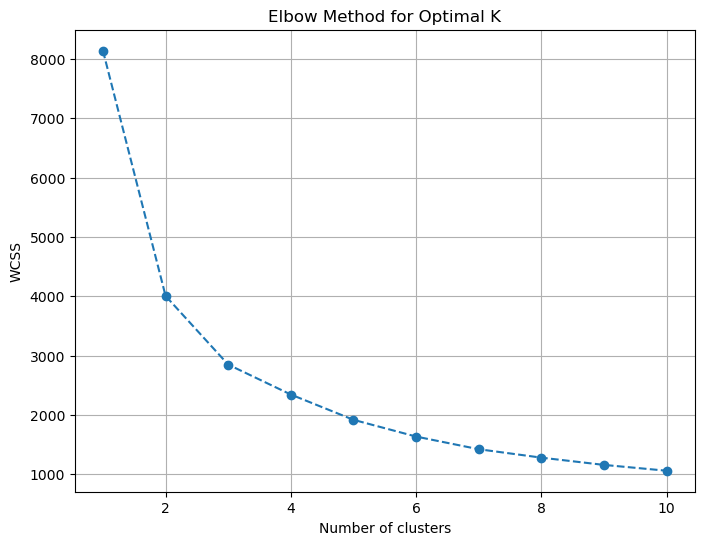

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have combined_points as a 2D NumPy array with your data
# You might want to standardize your data for K-means
scaler = StandardScaler()
combined_points_scaled = scaler.fit_transform(combined_points)

# Initialize a list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Try different numbers of clusters (e.g., from 1 to a reasonable maximum)
for i in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(combined_points_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [8]:
from sklearn.mixture import GaussianMixture

# Assuming you have already fitted a GMM model and stored it in 'gmm'
# For a specific (x, y) point
point_to_estimate = [[-0.00000003, 0.0003]]

# Calculate the log likelihood, which represents the probability
log_prob = gmm.score_samples(point_to_estimate)

# The result is a log likelihood; you can convert it to a probability
probability = np.exp(log_prob)

# Now 'probability' contains the estimated probability of the point (x, y) in the GMM.
probability

array([1.55013264e-29])